# **ĐỒ ÁN CUỐI KÌ DS301.**

GẮN NHẴN TỪ LOẠI TRÊN BỘ DỮ LIỆU VSLP NĂM 2013.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from collections import defaultdict
import unicodedata as ud
import pandas as pd
import numpy as np
import math
import ast
import re

# PHẦN 1: TIỀN XỬ LÝ DỮ LIỆU.

## Bước 1: Đọc dữ liệu.

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
from io import BytesIO
import pandas as pd
import numpy as np
import requests
import seaborn as sns
np.random.seed(0)
plt.style.use("ggplot")
import tensorflow as tf

In [44]:
# data_train.
df_train=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_train_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
# Đổi tên các cột.
df_train.columns = ('Words','Tags')
# Đưa về dạng chữ thường.
df_train["Words"]=df_train["Words"].str.lower()

In [45]:
# data_test.
df_test=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_test_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
df_test.columns = ('Words','Tags')
df_test["Words"]=df_test["Words"].str.lower()

In [46]:
# data_dev.
df_dev=pd.read_csv("/content/drive/MyDrive/Đồ Án DS310/data/VLSP2013-POS-data/VLSP2013_POS_dev_BI_POS_Column.txt",
                     sep='\t',header=None,encoding='UTF-8', error_bad_lines=False,skip_blank_lines=False)
df_dev.columns = ('Words','Tags')
df_dev["Words"]=df_dev["Words"].str.lower()

In [47]:
df_train.head()

Words Tags
0  hải_tặc    N
1  eo_biển    N
2  malacca   Np
3        (   CH
4       kỳ    N

## Bước 2: Phân chia các câu.


### Vấn đề đặt ra.
Các câu sẽ được chia dựa vào xuống dòng để kết thúc mỗi câu. Vì vậy ta sẽ sử dụng hàm để gắn nhãn theo ý tưởng của hàm sau đây


In [48]:
lis=[4,6,9]
def list_sentence(lis):
  arr=[0]
  x=0
  y=0
  for i in range(len(lis)):
    for j in range(int(lis[i]-y)):
      arr.append(x)
    x+=1
    y=lis[i]
  return arr

list_sentence(lis)

[0, 0, 0, 0, 0, 1, 1, 2, 2, 2]

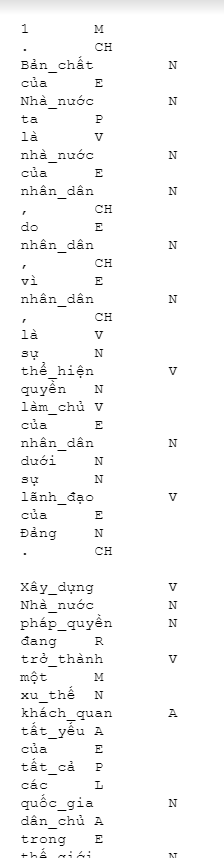

In [49]:
df_test[20:40]

Words Tags
20       quyền    N
21     làm_chủ    V
22         của    E
23    nhân_dân    N
24        dưới    N
25          sự    N
26    lãnh_đạo    V
27         của    E
28        đảng    N
29           .   CH
30         NaN  NaN
31    xây_dựng    V
32    nhà_nước    N
33  pháp_quyền    N
34        đang    R
35   trở_thành    V
36         một    M
37      xu_thế    N
38  khách_quan    A
39     tất_yếu    A

### Tiến hành xử lý gắn câu.

- Gắn câu cho tập train.

In [50]:
# Tìm các index là NaN ở ô tags.
list_index=df_train[df_train['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_train['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_train.drop(list_index, inplace=True)

- Gắn câu cho tập dev.

In [51]:
# Tìm các index là NaN ở ô tags.
list_index=df_dev[df_dev['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_dev['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_dev.drop(list_index, inplace=True)

- Gắn câu cho tập test.

In [52]:
# Tìm các index là NaN ở ô tags.
list_index=df_test[df_test['Tags'].isnull()].index
# Tìm list các số thứ tự câu
list_sentences=list_sentence(list_index)
# Gắn vào data.
df_test['Sentences']= list_sentences
# Xóa nhưng cốt xuống dòng dừa các câu.
df_test.drop(list_index, inplace=True)

In [53]:
df_test

Words Tags  Sentences
0             1    M          0
1             .   CH          0
2      bản_chất    N          0
3           của    E          0
4      nhà_nước    N          0
...         ...  ...        ...
68460       vào    E       2119
68461  đời_sống    N       2119
68462  một_cách    R       2119
68463  hệ_thống    N       2119
68464         .   CH       2119

[66346 rows x 3 columns]

## Bước 3: Kiểm tra bộ dữ liệu.

In [54]:
# Kiểm tra kích thước.
print(df_dev.shape)
print(df_test.shape)
print(df_train.shape)

(22823, 3)
(66346, 3)
(608960, 3)


### Xử lý sai sót.


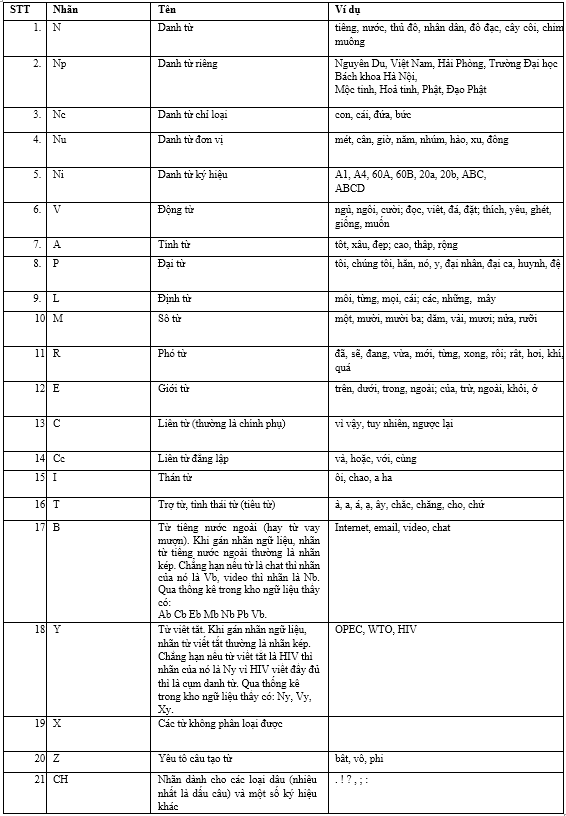

In [55]:
# Kiểm tra số lượng nhãn.
print((df_dev['Tags'].nunique()))
print((df_test['Tags'].nunique()))
print((df_train['Tags'].nunique()))

20
21
32


Do ở tập test

- Chúng ta có trong phần mô tả là 21 nhãn của thuộc tính tags. Những phần nhãn 'Y' có thể được chia ra thành các nhãn nhỏ khác nhau vì thế ở tập train ta có tận 32 nhãn vì vậy chúng ta sẽ format lại về nhãn Y.

#### Xử lý tags trên tập train.

In [56]:
# Kiểm tra nhãn tập train.
df_train['Tags'].unique()

array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C',
       'Ny', 'T', 'Nb', 'Y', 'Nu', 'Cc', 'Vb', 'I', 'X', 'Z', 'B', 'Eb',
       'Vy', 'Ab', ',', 'Cb', 'Mb', 'Pb', 'Ni', 'Xy'], dtype=object)

- Nhận thấy trong qua trình gắn nhãn bị sai ở cột tag.

In [57]:
# Phát hiện sai nhãn ở tập train.
df_train.loc[df_train["Tags"]==',']

Words Tags  Sentences
89396     ,    ,       3897

- Do chỉ sai ở 1 ô và đây là dấu ',' vì thế ta sẽ gắn nhãn lại tag "CH" ở đây.

In [58]:
df_train["Tags"].replace(',','CH',inplace=True)

- Bây giờ ta đã có một tập train gồm các tag đầy đủ.

In [59]:
print((df_train['Tags'].nunique()))

31


In [60]:
df_train['Tags'].unique()

array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C',
       'Ny', 'T', 'Nb', 'Y', 'Nu', 'Cc', 'Vb', 'I', 'X', 'Z', 'B', 'Eb',
       'Vy', 'Ab', 'Cb', 'Mb', 'Pb', 'Ni', 'Xy'], dtype=object)

- Format lại các tags.

In [61]:
# format nhãn B.
df_train['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_train['Tags'].replace(['Ny', 'Vy','Xy'], 
                         ['Y','Y','Y'], inplace=True)

In [62]:
print("Số nhãn tags trên tập train: ",df_train['Tags'].nunique())
df_train['Tags'].unique()

Số nhãn tags trên tập train:  21


array(['N', 'Np', 'CH', 'M', 'R', 'A', 'P', 'V', 'Nc', 'E', 'L', 'C', 'Y',
       'T', 'B', 'Nu', 'Cc', 'I', 'X', 'Z', 'Ni'], dtype=object)

#### Kiểm tra trên 2 tập còn lại.

In [63]:
# format nhãn B.
df_dev['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_dev['Tags'].replace(['Ny', 'Vy','Xy'], 
                         ['Y','Y','Y'], inplace=True)

# format nhãn B.
df_test['Tags'].replace(['Ab', 'Cb','Eb','Mb','Nb','Pb','Vb'], 
                         ['B','B','B','B','B','B','B'], inplace=True)
# format nhãn Y.
df_test['Tags'].replace(['Ny', 'Vy','Xy','NY'], 
                         ['Y','Y','Y','Y'], inplace=True)

In [64]:
df_dev['Tags'].nunique()

19

In [65]:
df_test['Tags'].unique()

array(['M', 'CH', 'N', 'E', 'P', 'V', 'R', 'A', 'L', 'Cc', 'X', 'Np',
       'Nc', 'C', 'T', 'Y', 'Ni', 'Z', 'I', 'Nu'], dtype=object)

- Kiểm tra lại cuối cùng.

In [66]:
print((df_dev['Tags'].nunique()))
print((df_test['Tags'].nunique()))
print((df_train['Tags'].nunique()))

19
20
21


### Xử lý missing.

In [67]:
df_train[df_train['Words'].isnull()]

Words Tags  Sentences
257911   NaN    N      11509
304459   NaN    N      13439
310763   NaN    N      13693
310930   NaN    N      13701

- Sau khi kiểm tra ở bộ dữ liệu. Ta nhận thấy có chút nhầm lẫn khi đọc dữ liệu ở đây là. Từ "nan" trong tiếng việt, ví dụ như "nan hoa", "nan tre" bị hiểu nhầm là giá trị null. Vì thế ta cần đổi lại cho phù hợp.

In [68]:
df_dev=df_dev.fillna('nan')

In [69]:
df_train=df_train.fillna('nan')

- Kiểm tra lại sau khi điền giá trị null.

In [70]:
df_train.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

In [71]:
df_dev.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

In [72]:
df_test.isnull().sum()

Words        0
Tags         0
Sentences    0
dtype: int64

=> Dữ liệu đã ở dạng hoàn hảo.

## Bước 4: Tạo ra bộ dữ liệu đã được chuẩn hóa và sữa lỗi.

Có thể thấy sau là dữ liệu ban đầu chưa được chuẩn hóa về nhãn tags cho nên ta sẽ tiến hành lưu và gộp tập dev vào tập train.

In [73]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Words"].values.tolist(),
                                                           s["Tags"].values.tolist())]
        self.grouped = self.data.groupby("Sentences").apply(agg_func)
        self.sentences = [s for s in self.grouped]

In [74]:
getter_train = SentenceGetter(df_train)
getter_test = SentenceGetter(df_test)
getter_Dev = SentenceGetter(df_dev)
sentences_train = getter_train.sentences
sentences_test = getter_test.sentences
sentences_dev = getter_Dev.sentences

- Gộp gộm tập dev vào tập train.

In [75]:
for i in sentences_dev:
  sentences_train.append(i)

In [76]:
len(sentences_train)

27870

In [77]:
len(sentences_test)

2120

- Tệp được gắn nhãn.

In [78]:
with open('test_gold.txt', 'w', encoding='utf-8') as f:
    for i, t in enumerate(sentences_test):
      for z in t:
        f.write(f'{z[0]}\t{z[1]}\n')
      f.write('\n')

In [79]:
with open('train_gold.txt', 'w', encoding='utf-8') as f:
    for i, t in enumerate(sentences_train):
      for z in t:
        f.write(f'{z[0]}\t{z[1]}\n')
      f.write('\n')

- Tập không được gắn nhãn.

In [80]:
with open('test_words.txt', 'w', encoding='utf-8') as f:
    for i, t in enumerate(sentences_test):
      for z in t:
        f.write(f'{z[0]}\n')
      f.write('\n')

In [81]:
with open('train_words.txt', 'w', encoding='utf-8') as f:
    for i, t in enumerate(sentences_train):
      for z in t:
        f.write(f'{z[0]}\n')
      f.write('\n')

# PHẦN 2: ĐỌC DỮ LIỆU.

## Bước 1: Xây dựng tập từ vựng từ tập FastText embedding.

In [82]:
word_dict = []
embeddings_index = {}
embedding_dim = 300
max_feature = len(embeddings_index) + 2

f = open('/content/drive/MyDrive/Đồ Án DS310/Word_EmBedding/FastText_ner.vec')
for line in f:
    values = line.split(' ')
    word = values[0] 
    word_dict.append(word)
    try:
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
    except Exception as e:
        pass
f.close()

print('Embedding data loaded')

Embedding data loaded


In [83]:
vocabs_dict = {w : i+2  for i, w in enumerate(word_dict)}
vocabs_dict['--n--'] = 0
vocabs_dict['--unk--'] = 1

In [84]:
print('Số lượng từ vựng:', len(vocabs_dict.keys()))
count = 0

for key, value in vocabs_dict.items():
    print(f'{key}: {value}')
    count += 1
    if count > 40: break

Số lượng từ vựng: 15977
15974: 2
!: 3
": 4
%: 5
&: 6
': 7
(: 8
): 9
*: 10
+: 11
,: 12
-: 13
.: 14
..: 15
...: 16
....: 17
/: 18
0: 19
0,04%: 20
0,5: 21
0,6: 22
0,7%: 23
01: 24
018: 25
019: 26
04: 27
091: 28
1: 29
1%: 30
1,1: 31
1,2: 32
1,3: 33
1,4: 34
1,5: 35
1,58: 36
1,6: 37
1,60: 38
1,61: 39
1,7: 40
1,70: 41
1,8: 42


## Bước 2: Xây dựng các hàm.

In [85]:
# Hàm xử lý nhứng từ không có trong thư viện.
def preprocess(vocabs_dict, path):
    data = []
    file = open(path, encoding='utf-8').readlines()
    
    for index, word in enumerate(file):
        if not word.split():
            word ='--n--'
            data.append(word)
            continue
        elif word.strip() not in vocabs_dict:
            word ='--unk--'
            data.append(word)
            continue
        data.append(word.strip())
    return data

In [86]:
def plot_tag_counts(gold):
    tags = [word_tag.split()[1] for word_tag in gold if word_tag.split()]
    tag_counts = pd.DataFrame(tags)[0].value_counts()
    tag_counts.plot.bar(rot=0, width=0.7, legend=False, figsize=(15, 5))
    return pd.DataFrame(tag_counts).T.assign(Total=tag_counts.sum()) 

## Bước 3: Visualize dữ liệu 2 tập train và test.

- Tập train.

In [87]:
train_gold = open('train_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập train_gold:', len(train_gold))
train_gold[0:5]

Số lượng từ trong tập train_gold: 659653


['hải_tặc\tN\n', 'eo_biển\tN\n', 'malacca\tNp\n', '(\tCH\n', 'kỳ\tN\n']

In [88]:
train_words = preprocess(vocabs_dict, 'train_words.txt')
print('Số lượng từ trong tập train_words:', len(train_words))
train_words

Số lượng từ trong tập train_words: 659653


['hải_tặc',
 'eo_biển',
 'malacca',
 '(',
 'kỳ',
 '1',
 ')',
 ':',
 'eo_biển',
 'không',
 'yên_tĩnh',
 '...',
 '--n--',
 'đó',
 'là',
 'con',
 'đường',
 'biển',
 'ngắn',
 'nhất',
 'để',
 'đi',
 'từ',
 'ấn_độ_dương',
 'sang',
 'thái_bình_dương',
 ',',
 'chiếm',
 'đến',
 'lượng',
 '--unk--',
 'lưu_thông',
 'đường_biển',
 'của',
 'thế_giới',
 ',',
 'đó',
 'là',
 'hải_trình',
 'lớn',
 'nhất',
 'từ',
 'tây',
 'sang',
 'đông',
 'với',
 '50.000',
 'lượt',
 'tàu_bè',
 'qua_lại',
 'mỗi',
 'năm',
 '...',
 '--n--',
 'một',
 'chuyến',
 'hải_trình',
 'xuyên',
 'ba',
 'nước',
 'malaysia',
 ',',
 'singapore',
 ',',
 'indonesia',
 'vừa',
 'được',
 'phóng_viên',
 'tuổi_trẻ',
 'thực_hiện',
 ',',
 'để',
 'cảm_nhận',
 'điều',
 'mà',
 'các',
 '--unk--',
 'tàu',
 'viễn_dương',
 'đã',
 'cảm_nhận',
 'mỗi',
 'khi',
 'nghe',
 'nhắc',
 'tới',
 ':',
 'hải_tặc',
 'eo_biển',
 'malacca',
 '!',
 '...',
 '--n--',
 'từ',
 'bức',
 'điện',
 'của',
 '--unk--',
 '...',
 '--n--',
 'chúng_tôi',
 'lên_đường',
 'ngay',
 'khi',

Các từ không nằm trong vocabs: hàng_hóa, thủy_thủ, imb, noel_choong, imb, '', imb, '', '', '', '', '', băng_băng, km2, rempang, dony, '', đỏ_đèn, '', phillips_channel, thủy_thủ, '', '', '', '', '', '', indonesia_agusman, '', '', thủy_thủ, '', '', thủy_thủ, thủy_thủ, '', '', '', '', thủy_thủ, '', thủy_thủ, '', '', '', '', thủy_thủ, '', '', '', '', '', thủy_thủ, sitompul_m., batam_pos, '', thủy_thủ, thủy_thủ, '', sitompul_m., '', '', '', '', thủy_thủ, '', '', '', '', '', '', '', '', thủy_thủ, '', '', '', thủy_thủ, '', thủy_thủ, '', '', '', '', '', thủy_thủ, '', '', hàng_hóa, '', '', '', '', '', '', '', '', '', '', '', '', '', batam_pos, '', '', '', '', sepetang, kuala_sepetang, jboh_yang_chua, kuala_sepetang, '', văn_hóa, kuala_sepetang, ma_túy, '', teh_chor_joo, jboh_yang_chua, '', '', '', chua_tiong_san, '', chua_tiong_san, kuala_sepetang, chua_tiong_san, chua_tiong_san, jboh_yang_chua, yang_chua, chua_tiong_san, '', '', '', '', jboh_yang_chua, '', '', '', '', '', '', '', đe_dọa, '', '

N       V     CH      E      R      A  ...     X    B    Z    I  Ni   Total
0  162847  124430  90313  43672  41003  39280  ...  2275  724  354  213  68  631783

[1 rows x 22 columns]

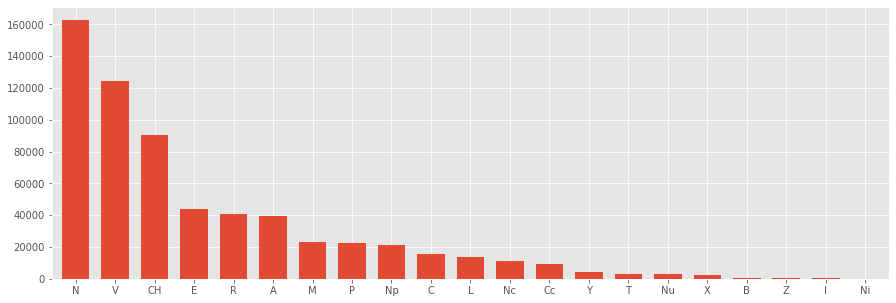

In [89]:
print('Các từ không nằm trong vocabs', end=': ')
a=[]
for word_tag, word in zip(train_gold, train_words):
    if word == '--unk--': 
      print(word_tag.split()[0],end=', ')
      a.append(word_tag.split()[0])
plot_tag_counts(train_gold)

- Tập test.

In [90]:
test_gold = open('test_gold.txt', encoding='utf-8').readlines()
print('Số lượng từ trong tập test_gold:', len(test_gold))
test_gold[0:5]

Số lượng từ trong tập test_gold: 68466


['1\tM\n', '.\tCH\n', 'bản_chất\tN\n', 'của\tE\n', 'nhà_nước\tN\n']

In [91]:
test_words = preprocess(vocabs_dict, 'test_words.txt')
print('Số lượng từ trong tập test_words:', len(test_words))
test_words[0:5]

Số lượng từ trong tập test_words: 68466


['1', '.', 'bản_chất', 'của', 'nhà_nước']

Các từ không nằm trong vocabs: pháp_quyền, pháp_quyền, pháp_lí, công_lí, pháp_quyền, pháp_quyền, pháp_quyền, pháp_quyền, chủ_nghĩa_xã_hội, pháp_quyền, pháp_quyền, pháp_quyền, con_đẻ, đại_đoàn_kết, '', giống_nòi, '', thai_nghén, cao-bắc-lạng, pháp_lí, thiết_chế, lập_hiến, nền_tảng, pháp_quyền, '', quyền_hạn, '', '', quyền_hạn, '', tư_liệu_sản_xuất, cao_quý, '', '', '', bóc_lột, làm_tròn, lo_tính, '', '', '', hoạch_định, đường_lối, '', '', pháp_quyền, nền_tảng, uy_quyền, pháp_lí, quỹ_đạo, hồ_chủ_tịch, '', tuyển_cử, phổ_thông_đầu_phiếu, ứng_cử, giòng, '', '', '', suông, chậu, '', '', '', '', thiết_chế, đầu_phiếu, hiến_pháp, đạo_luật, nhất_quán, hiến_pháp, lập_hiến, xx, nhà_yêu_nước, phan_bội_châu, phan_chu_trinh, huỳnh_thúc_kháng, hiến_pháp, lập_hiến, hiến_pháp, '', '', bộ_luật, ban_bố, sắc_lệnh, sắc_lệnh, đạo_luật, lập_quy, lập_pháp, sắc_lệnh, sắc_lệnh, hiến_pháp, sắc_lệnh, chủ_tịch_nước, đạo_luật, bộ_luật, bộ_luật, bộ_luật, bộ_luật, bộ_luật, pháp_quy, hành_pháp, lập_pháp, chồng_chéo, 19

N      V    CH     E     A     R     L  ...    T  Nc  Ni   Z  Nu  I  Total
0  20456  13627  8788  6278  4036  2668  2469  ...  164  47  26  13   2  1  66346

[1 rows x 21 columns]

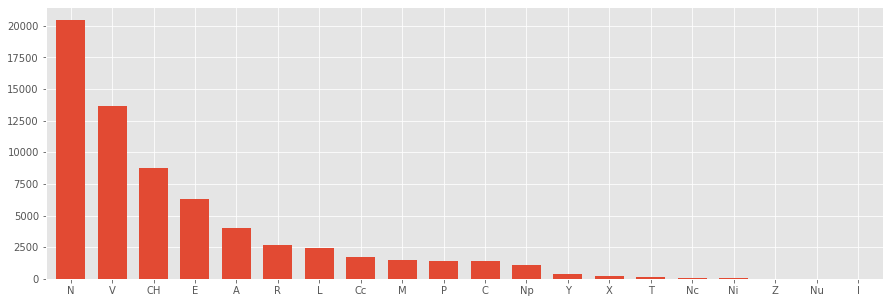

In [92]:
print('Các từ không nằm trong vocabs', end=': ')
for word_tag, word in zip(test_gold, test_words):
    if word == '--unk--': print(word_tag.split()[0], end=', ')
plot_tag_counts(test_gold)

# PHẦN 3: Parts of Speech Tagging.

- Training

In [93]:
def seperate_word_tag(word_tag, vocabs_dict): 
    if not word_tag.split():
        word = '--n--'
        tag = '--s--'
    else:
        word, tag = word_tag.split()
        if word not in vocabs_dict: word = '--unk--'
    return word, tag
def create_dictionaries(train_gold, vocab):
    emission_counts = defaultdict(int)
    transition_counts = defaultdict(int)
    tag_counts = defaultdict(int)
    
    prev_tag = '--s--' 
    for word_tag in train_gold:
        word, tag = seperate_word_tag(word_tag, vocab) 
        
        transition_counts[(prev_tag, tag)] += 1
        emission_counts[(tag, word)] += 1
        tag_counts[tag] += 1
        prev_tag = tag
    return transition_counts, emission_counts, tag_counts

In [94]:
transition_counts, emission_counts, tag_counts = create_dictionaries(train_gold, vocabs_dict)
states = sorted(tag_counts.keys())
print('Số nhãn:', len(states))
print(states)

Số nhãn: 22
['--s--', 'A', 'B', 'C', 'CH', 'Cc', 'E', 'I', 'L', 'M', 'N', 'Nc', 'Ni', 'Np', 'Nu', 'P', 'R', 'T', 'V', 'X', 'Y', 'Z']


In [95]:
print("Transition examples: ")
for example in list(transition_counts.items())[:6]:
    print(example)

Transition examples: 
(('--s--', 'N'), 7728)
(('N', 'N'), 31786)
(('N', 'Np'), 7536)
(('Np', 'CH'), 8799)
(('CH', 'N'), 16556)
(('N', 'M'), 5225)


In [96]:
print("Emission examples: ")
for example in list(emission_counts.items())[:3]:
    print (example)

Emission examples: 
(('N', 'hải_tặc'), 67)
(('N', 'eo_biển'), 41)
(('Np', 'malacca'), 38)


- Testing.

In [97]:
def predict_pos(words, gold, emission_counts, vocabs_dict, states):
    num_correct = 0
    all_words = set(emission_counts.keys())
    
    for word, gold_tuple in zip(words, gold): 
        gold_tuple_list = gold_tuple.split()
        if len(gold_tuple_list) != 2: continue
        else: true_label = gold_tuple_list[1]
    
        count_final = 0
        pos_final = ''
        if word not in vocabs_dict: continue
        
        for pos in states:
            if (pos, word) not in emission_counts: continue
            count = emission_counts[(pos, word)]
            
            if count > count_final:
                count_final = count
                pos_final = pos
                    
        if pos_final == true_label: num_correct += 1
    accuracy = num_correct / len(gold)
    return accuracy

In [98]:
accuracy = predict_pos(train_words, train_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập train:', accuracy)

Độ chính xác trên tập train: 0.8544128503925549


In [99]:
accuracy = predict_pos(test_words, test_gold, emission_counts, vocabs_dict, states)
print('Độ chính xác trên tập test:', accuracy)

Độ chính xác trên tập test: 0.8583238395700056


# PHẦN 4: Ma trận xác suất Hidden Markov.

- Ma trận chuyển tiếp 'A' (transition matrix)

In [104]:
def create_transition_matrix(alpha, tag_counts, transition_counts):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(all_tags)
    
    A = np.zeros((num_tags, num_tags))
    trans_keys = set(transition_counts.keys())
    
    for i in range(num_tags):
        for j in range(num_tags):
            count = 0
            key = (all_tags[i], all_tags[j])
            if key in transition_counts: count = transition_counts[key]
                
            count_prev_tag = tag_counts[all_tags[i]]
            A[i, j] = (count + alpha) / (count_prev_tag + alpha * num_tags)
    return A

In [105]:
alpha = 0.001
for i in range(len(states)): tag_counts.pop(i, None)
    
A = create_transition_matrix(alpha, tag_counts, transition_counts)
df = pd.DataFrame(
    A[0:5, 0:5], 
    index = states[0:5], 
    columns = states[0:5]
)
df.head()

--s--         A         B         C        CH
--s--  3.588085e-08  0.033369  0.000431  0.072695  0.057158
A      1.909393e-03  0.061838  0.000229  0.046945  0.262474
B      1.382555e-03  0.073204  0.037293  0.031768  0.349438
C      6.462026e-08  0.046204  0.000323  0.016995  0.054863
CH     2.999014e-01  0.030837  0.001063  0.031025  0.091438

- Ma trận phát xạ 'B' (emission matrix)

In [106]:
def create_emission_matrix(alpha, tag_counts, emission_counts, vocabs):
    all_tags = sorted(tag_counts.keys())
    num_tags = len(tag_counts)
    num_words = len(vocabs)
    
    B = np.zeros((num_tags, num_words))
    emis_keys = set(list(emission_counts.keys()))
    
    for i in range(num_tags):
        for j in range(num_words):
            count = 0
            key = (all_tags[i], vocabs[j])
            if key in emission_counts.keys(): count = emission_counts[key]
                
            count_tag = tag_counts[all_tags[i]]
            B[i, j] = (count + alpha) / (count_tag + alpha * num_words)
    return B

In [107]:
cidx  = ['12', 'tre', 'xe_đạp', 'nam', 'vị_trí']
rvals = ['--s--', 'V', 'CH', 'Cc', 'E', 'L']
cols = [vocabs_dict[word] for word in cidx]
rows = [states.index(tag) for tag in rvals]

for i in range(len(states)): tag_counts.pop(i, None)
B = create_emission_matrix(alpha, tag_counts, emission_counts, list(vocabs_dict))

df = pd.DataFrame(B[np.ix_(rows, cols)], index=rvals, columns=cidx)
df.head()

12           tre        xe_đạp           nam        vị_trí
--s--  3.586032e-08  3.586032e-08  3.586032e-08  3.586032e-08  3.586032e-08
V      8.035615e-09  8.035615e-09  4.018611e-05  8.035615e-09  8.035615e-09
CH     1.107064e-08  1.107064e-08  1.107064e-08  1.107064e-08  1.107064e-08
Cc     1.064965e-07  1.064965e-07  1.064965e-07  1.064965e-07  1.064965e-07
E      2.288959e-08  2.288959e-08  2.288959e-08  2.288959e-08  2.288959e-08

# PHẦN 5: THUẬT TOÁN VITERBI.

Do 2 ma trận A, B đều sẽ tính toán xác suất cho nhãn --s-- (nhãn bắt đầu) bình thường như các nhãn khác nên lúc dự đoán nhãn --s-- cũng có thể sẽ được gán cho bất kỳ từ nào. Nếu muốn nhãn --s-- không được gán khi dự đoán thì:

Bỏ qua cột đầu khi sử dụng ma trận A => Khi sử dụng lại ma trận A trong thuật toán Viterbi phải trừ đi 1 ở cột
Bỏ qua hàng đầu khi sử dụng ma trận B => Khi sử dụng lại ma trận B trong thuật toán Viterbi phải trừ đi 1 ở hàng

In [108]:
A = np.array([sublist[1:].tolist() for sublist in A])
B = B[1:]

In [109]:
A.shape

(22, 21)

In [110]:
B.shape

(21, 15977)

## Bước 1: INitialization.

In [111]:
def viterbi_initialize(states, tag_counts, A, B, corpus, vocabs_dict):
    num_tags = len(tag_counts)
    s_idx = states.index('--s--')
    
    best_probs = np.zeros((num_tags, len(corpus)))
    best_paths = np.zeros((num_tags, len(corpus)), dtype=int)
    
    for i in range(num_tags):
        if A[s_idx, i - 1] == 0: best_probs[i, 0] = float('-inf')
        else: 
            index = vocabs_dict[corpus[0]]
            # best_probs[i, 0] = math.log(A[s_idx, i]) + math.log(B[i, index])
            best_probs[i, 0] = math.log(A[s_idx, i - 1]) + math.log(B[i - 1, index])
    return best_probs, best_paths

In [112]:
best_probs_train, best_paths_train = viterbi_initialize(states, tag_counts, A, B, train_words, vocabs_dict)
print('best_probs_train[0, 0]:', best_probs_train[0, 0]) 
print('best_paths_train[2, 3]:', best_paths_train[2, 6])

best_probs_train[0, 0]: -20.57151305073174
best_paths_train[2, 3]: 0


In [113]:
best_probs_test, best_paths_test = viterbi_initialize(states, tag_counts, A, B, test_words, vocabs_dict)
print('best_probs_test[0, 0]:', best_probs_test[0, 0]) 
print('best_paths_test[2, 3]:', best_paths_test[2, 3])

best_probs_test[0, 0]: -20.57151305073174
best_paths_test[2, 3]: 0


## Bước 2: Forward.

In [114]:
def viterbi_forward(A, B, corpus, best_probs, best_paths, vocabs_dict):
    num_tags = best_probs.shape[0]
    
    for i in range(1, len(corpus)): 
        if i % 50000 == 0: print(f'Processed {i} words...')
            
        for j in range(num_tags):
            best_prob_i = float('-inf')
            best_path_i = None
            
            for k in range(num_tags): 
                
                index = vocabs_dict[corpus[i]]               
                prob = best_probs[k, i - 1] + math.log(A[k, j - 1]) + math.log(B[j - 1, index])

                if float(prob) > best_prob_i:
                    best_prob_i = prob
                    best_path_i = k
                    
            best_probs[j, i] = best_prob_i
            best_paths[j, i] = best_path_i
            
    return best_probs, best_paths

In [115]:
best_probs_train, best_paths_train = viterbi_forward(A, B, train_words, best_probs_train, best_paths_train, vocabs_dict)
print('best_probs_train[0, 1]:', best_probs_train[0, 1]) 
print('best_paths_train[0, 4]:', best_paths_train[0, 4])

Processed 50000 words...
Processed 100000 words...
Processed 150000 words...
Processed 200000 words...
Processed 250000 words...
Processed 300000 words...
Processed 350000 words...
Processed 400000 words...
Processed 450000 words...
Processed 500000 words...
Processed 550000 words...
Processed 600000 words...
Processed 650000 words...
best_probs_train[0, 1]: -35.07538116968219
best_paths_train[0, 4]: 4


In [116]:
best_probs_test, best_paths_test = viterbi_forward(A, B, test_words, best_probs_test, best_paths_test, vocabs_dict)
print('best_probs_test[0, 1]:', best_probs_test[0, 1]) 
print('best_paths_test[0, 4]:', best_paths_test[0, 4])

Processed 50000 words...
best_probs_test[0, 1]: -31.976034301961974
best_paths_test[0, 4]: 18


## Bước 3: Backward.

In [117]:
def viterbi_backward(best_probs, best_paths, corpus, states):
    m = best_paths.shape[1] 
    z = [None] * m
    pred = [None] * m
    
    best_prob_for_last_word = float('-inf')
    num_tags = best_probs.shape[0]
    
    for k in range(num_tags):
        if best_probs[k, m - 1] > best_prob_for_last_word:
            best_prob_for_last_word = best_probs[k, m - 1]
            z[m - 1] = k
            
    pred[m - 1] = states[z[m - 1]]
    for i in range(m - 1, -1, -1):
        z[i - 1] = best_paths[z[i], i]
        pred[i - 1] = states[z[i - 1]]
    return pred

In [118]:
train_pred = viterbi_backward(best_probs_train, best_paths_train, train_words, states)
test_pred = viterbi_backward(best_probs_test, best_paths_test, test_words, states)
m = len(test_pred)

print(f'Dự đoán cho test_pred[-7:{m - 1}]:')
print(test_words[-7:m-1])
print(test_pred[-7:m-1])

print('Dự đoán cho test_pred[0:7]:')
print(test_words[0:7])
print(test_pred[0:7])

Dự đoán cho test_pred[-7:68465]:
['pháp_luật', 'vào', 'đời_sống', 'một_cách', 'hệ_thống', '.']
['V', 'V', 'N', 'X', 'V', 'CH']
Dự đoán cho test_pred[0:7]:
['1', '.', 'bản_chất', 'của', 'nhà_nước', 'ta', 'là']
['M', 'CH', 'N', 'V', 'N', 'N', 'X']


# PHẦN 6: ĐÁNH GIÁ KẾT QUẢ.

In [119]:
for word, tag in zip(test_words, test_pred):
    if word == '--n--': print()
    else: print(f'{word}/{tag}', end=' ')

1/M ./CH bản_chất/N của/V nhà_nước/N ta/N là/X nhà_nước/N của/V nhân_dân/N ,/CH do/C nhân_dân/N ,/CH vì/C nhân_dân/N ,/CH là/X sự/N thể_hiện/N quyền/N làm_chủ/V của/V nhân_dân/N dưới/N sự/N lãnh_đạo/Np của/V đảng/N ./CH 
xây_dựng/N nhà_nước/N --unk--/CH đang/A trở_thành/N một/L xu_thế/V khách_quan/V tất_yếu/A của/V tất_cả/P các/N quốc_gia/N dân_chủ/N trong/Np thế_giới/C hiện_đại/N ./CH 
tính/V phổ_biến/N của/V nhà_nước/N --unk--/CH thể_hiện/N ở/V chỗ/V nó/X đảm_bảo/V cho/C nhà_nước/N được/Z tổ_chức/N và/N hoạt_động/V phù_hợp/V với/V những/Np tư_tưởng/A chính_trị/A -/CH --unk--/CH tiến_bộ/N của/V nhân_loại/N -/CH công_bằng/V ,/CH nhân_đạo/Np ,/CH dân_chủ/N ,/CH pháp_chế/N ,/CH đề_cao/V --unk--/CH ,/CH tự_do/V và/N quyền/N con_người/Y ./CH 
với/V tính_cách/N là/X một/L phương_thức/N thể_hiện/N quyền_lực/Nc chính_trị/A và/N quyền_lực/Nc nhà_nước/N ,/CH hiệu_quả/N của/V nhà_nước/N --unk--/CH lại/A phụ_thuộc/V vào/V những/Np cơ_sở/N chính_trị/A ,/CH kinh_tế/Np -/CH xã_hội/V và/N văn_hoá/N c

In [120]:
from sklearn.metrics import classification_report
def report(pred, gold):
    y_pred = []
    y_true = []

    for prediction, word_tag in zip(pred, gold):
        word_tag_tuple = word_tag.split()
        if len(word_tag_tuple) != 2: continue 

        word, tag = word_tag_tuple
        y_pred.append(prediction)
        y_true.append(tag)
        
    print(classification_report(y_pred, y_true))
    return y_pred, y_true

In [123]:
print('Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:\n')
y_pred, y_true_test = report(test_pred, test_gold)

Kết quả của mô hình Hidden Markov kết hợp thuật toán Viterbi trên tập test:



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       --s--       0.00      0.00      0.00        76
           A       0.17      0.20      0.18      3269
           B       0.00      0.00      0.00        71
           C       0.14      0.14      0.14      1418
          CH       0.99      0.65      0.78     13310
          Cc       0.00      0.00      0.00        81
           E       0.00      0.23      0.01        81
           I       0.00      0.00      0.00       219
           L       0.00      0.00      0.00       566
           M       0.44      0.85      0.58       780
           N       0.49      0.47      0.48     21190
          Nc       0.02      0.00      0.01       318
          Ni       0.00      0.00      0.00        11
          Np       0.11      0.02      0.03      6845
          Nu       0.00      0.00      0.00        59
           P       0.13      0.56      0.21       319
           R       0.04      0.12      0.06      1032
           T       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
from sklearn.metrics import f1_score
print("Độ đo f1 trên toàn bộ tập dữ liêu:")
print("Micro : ",f1_score(y_pred, y_true_test , average='micro'))
print("Macro : ",f1_score(y_pred, y_true_test, average='macro'))

Độ đo f1 trên toàn bộ tập dữ liêu:
Micro :  0.3754107255900883
Macro :  0.13242586071127
